In [1]:
# homework 2 binary class data
import numpy as np
from numpy import linalg as LA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from matplotlib import interactive
import math

3.720075976020836e-44


In [2]:
# error rate function
def error_rate(label,algorithm_result):
    length = len(label)
    index = 0
    error = 0
    while index < length :
        if (label[index] != algorithm_result[index]):
            error = error + 1
        index = index + 1
    rate = error / length
    return rate

In [3]:
# get W
def Get_W(test_data_point,train_data,tao):
    row = 0
    wi = []
    while row < 200:
        norm = LA.norm(test_data_point-train_data[row])
        norm = norm **2
        w = math.exp(-norm/(2 * tao **2))
        wi.append(w)
        row = row + 1
    return wi

In [4]:
# get training data
cols = 34
f = open('bclass-train')
train_label = []
train_data = np.zeros([200,34])
row = 0
for line in f.readlines():
    linearr = line.strip().split()
    train_label.append(int(linearr[0]))
    col = 0
    while col < cols:
        train_data[row][col] = float(linearr[col+1])
        col = col + 1
    row = row + 1
f.close()


In [5]:
# get test data
f = open('bclass-test')
test_label = []
test_data = np.zeros([76,34])
row = 0
for line in f.readlines():
    linearr = line.strip().split()
    test_label.append(int(linearr[0]))
    col = 0
    while col < cols:
        test_data[row][col] = float(linearr[col+1])
        col = col + 1
    row = row + 1
f.close()

In [6]:
# normalize train data
train_data_normed = np.zeros([200,34])
train_rows = 200
row = 0
while row < train_rows:
    norm = LA.norm(train_data[row])
    train_data_normed[row] = train_data[row]/norm
    row = row + 1

# normalize test data
test_data_normed = np.zeros([76,34])
test_rows = 76
row = 0
while row < test_rows:
    norm = LA.norm(test_data[row])
    test_data_normed[row] = test_data[row]/norm
    row = row + 1

In [7]:
max_iter = 0
test_error_Log_norm = []
test_error_Per_norm = []
train_error_Log_norm = []
train_error_Per_norm = []
test_error_Log = []
test_error_Per = []
train_error_Log = []
train_error_Per = []
num = []
num_Per = []
while max_iter <= 20 :
    max_iter = max_iter + 1
    num.append(max_iter)
    num_Per.append(max_iter*10)
    # logistic regression
    clf_Log = LogisticRegression( max_iter =max_iter,solver ='newton-cg')
    clf_Log.fit(train_data_normed, train_label)
    test_error_Log_norm.append(error_rate(test_label, clf_Log.predict(test_data_normed)))
    train_error_Log_norm.append(error_rate(train_label, clf_Log.predict(train_data_normed)))
    clf_Log.fit(train_data, train_label)
    test_error_Log.append(error_rate(test_label, clf_Log.predict(test_data)))
    train_error_Log.append(error_rate(train_label, clf_Log.predict(train_data)))

    # perceptron
    clf_Per = Perceptron( max_iter= max_iter * 10)
    clf_Per.fit(train_data_normed, train_label)
    test_error_Per_norm.append( error_rate(test_label, clf_Per.predict(test_data_normed)))
    train_error_Per_norm.append(error_rate(test_label, clf_Per.predict(train_data_normed)))
    clf_Per.fit(train_data, train_label)
    test_error_Per.append( error_rate(test_label, clf_Per.predict(test_data)))
    train_error_Per.append(error_rate(test_label, clf_Per.predict(train_data)))


C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


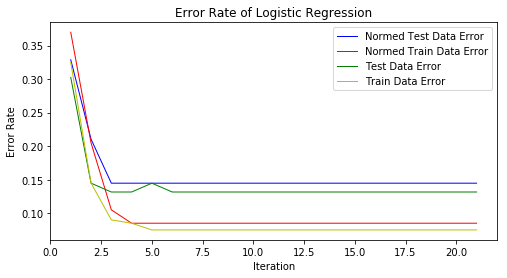

In [8]:
# plot figure
# figure of Logistic regression
plt.figure(figsize=(8,4))
plt.plot(num,test_error_Log_norm,"b",label = 'Normed Test Data Error ', linewidth=1)
plt.plot(num,train_error_Log_norm,"r",label = 'Normed Train Data Error',linewidth=1)
plt.plot(num,test_error_Log,"g",label = 'Test Data Error ', linewidth=1)
plt.plot(num,train_error_Log,"y",label = 'Train Data Error',linewidth=1)
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.title("Error Rate of Logistic Regression")
plt.legend()
interactive(True)
plt.show()

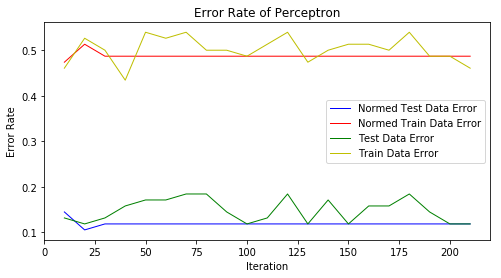

In [9]:
# plot figure
# figure of Perceptron
plt.figure(figsize=(8,4))
plt.plot(num_Per,test_error_Per_norm,"b",label = 'Normed Test Data Error ', linewidth=1)
plt.plot(num_Per,train_error_Per_norm,"r",label = 'Normed Train Data Error',linewidth=1)
plt.plot(num_Per,test_error_Per,"g",label = 'Test Data Error ', linewidth=1)
plt.plot(num_Per,train_error_Per,"y",label = 'Train Data Error',linewidth=1)
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.title("Error Rate of Perceptron")
plt.legend()
interactive(True)
plt.show()


In [10]:
# set w calculation
# when tao is 0.01, the result is too small to zero
tao = [0.01, 0.05, 0.1, 0.5, 1, 5]
tao_row = 0
clf_Log = LogisticRegression( max_iter =max_iter,solver ='newton-cg')
error_cnt = np.zeros([6, 1])
while tao_row < 6:
    rows = 0
    while rows < 76:
        wi = Get_W(test_data[rows],train_data,tao[tao_row])
        clf_Log.fit(train_data, train_label, wi)
        temp = test_data[rows].reshape(1, -1)
        label = clf_Log.predict(temp)
        if label != test_label[rows] :
            error_cnt[tao_row] = error_cnt[tao_row] + 1
        rows = rows + 1
    error_cnt[tao_row] = error_cnt[tao_row] / 76
    tao_row = tao_row + 1

C:\Program Files\Python36\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


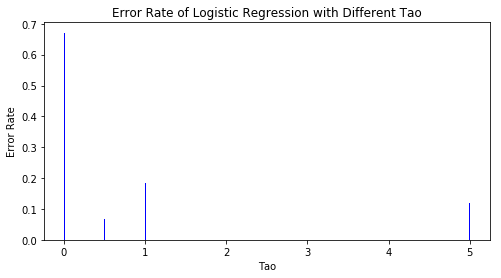

In [11]:
# plot figure
# figure of tao and error rate
plt.figure(figsize=(8,4))
plt.bar(tao,error_cnt,0.01,color = 'blue')
plt.xlabel("Tao")
plt.ylabel("Error Rate")
plt.title("Error Rate of Logistic Regression with Different Tao")
plt.legend()
interactive(False)
plt.show()